# new One - Dev started 15/02/2023


In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.cluster import KMeans
import statistics as s
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import statistics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    FunctionTransformer,
    LabelBinarizer,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn import preprocessing
import re

In [2]:
###variables
continuous_values = ["Age", "trestbps", "chol", "thalach", "oldpeak"]
NA_REPLACE = ["?"]

In [3]:
data = pd.read_table(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
    sep=",",
    header=None,
)

cols = [
    "Age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "num",
]

NR_COLS = len(cols)
data.columns = cols
data.head(4)


,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


In [4]:
# categorical variables are aprehend by difference
categorical_values = data[data.columns.difference(continuous_values)].columns

In [5]:
for col in NA_REPLACE:
    data.replace(col, np.nan, inplace=True)

In [6]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
x_cont = imp_mean.fit_transform(data[continuous_values])
imp_mean = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
x_cat = imp_mean.fit_transform(data[categorical_values])
data[continuous_values] = pd.DataFrame(x_cont, columns=continuous_values)
data[categorical_values] = pd.DataFrame(x_cat, columns=categorical_values)

In [7]:
# convert types
data[continuous_values] = data[continuous_values].astype("float64")
data[categorical_values] = data[categorical_values].astype("float64").astype(str)


In [8]:
silo1 = data.iloc[:100, :]
silo2 = data.iloc[100:200, :]
silo3 = data.iloc[200:300, :]

In [9]:
import pandas as pd
import numpy as np


def generate_dataframe_statistics(df, divisions=None):
    """
    Generate descriptive statistics as a DataFrame

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame to analyze
    divisions : list of tuples, optional
        Division ranges (default: [(0, 100), (100, 200), (200, 300)])

    Returns:
    --------
    pandas.DataFrame: Statistics for each division and column
    """
    # Default divisions if not provided
    if divisions is None:
        divisions = [(0, 100), (100, 200), (200, 300)]

    # Identify column types
    continuous_cols = df.select_dtypes(include=["float64", "int64"]).columns
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns

    # Initialize lists to collect results
    results = []

    # Analyze each division
    for div_start, div_end in divisions:
        # Subset the DataFrame for this division
        div_subset = df[(df.index >= div_start) & (df.index < div_end)]

        # Continuous column statistics
        for col in continuous_cols:
            results.append(
                {
                    "Division": f"{div_start}-{div_end}",
                    "Column": col,
                    "Type": "Continuous",
                    "Statistic": str(div_subset[col].mean())
                    + " ("
                    + str(round(div_subset[col].std(), 2))
                    + ")",
                }
            )

        # Categorical column statistics
        for col in categorical_cols:
            mode_series = div_subset[col].value_counts()
            mmode = mode_series.index[0] if not mode_series.empty else None
            results.append(
                {
                    "Division": f"{div_start}-{div_end}",
                    "Column": col,
                    "Type": "Categorical",
                    "Statistic": str(mmode) + " (" + str(mode_series.shape[0]) + ")",
                }
            )

    # Convert to DataFrame
    return pd.DataFrame(results)

In [10]:
# Assuming 'df' is your DataFrame
stats = generate_dataframe_statistics(
    data[["Age", "trestbps", "chol", "sex", "slope", "cp"]]
)
stats

,Division,Column,Type,Statistic
0,0-100,Age,Continuous,54.73 (8.12)
1,0-100,trestbps,Continuous,133.16 (15.55)
2,0-100,chol,Continuous,246.52 (49.13)
3,0-100,sex,Categorical,1.0 (2)
4,0-100,slope,Categorical,1.0 (3)
5,0-100,cp,Categorical,4.0 (4)
6,100-200,Age,Continuous,54.53 (9.49)
7,100-200,trestbps,Continuous,131.55 (19.48)
8,100-200,chol,Continuous,258.6 (57.01)
9,100-200,sex,Categorical,1.0 (2)


In [11]:
data[["Age", "trestbps", "chol", "sex", "slope", "cp"]].describe(include="all")


,Age,trestbps,chol,sex,slope,cp
count,303.000000,303.000000,303.000000,303,303,303
unique,NaN,NaN,NaN,2,3,4
top,NaN,NaN,NaN,1.0,1.0,4.0
freq,NaN,NaN,NaN,206,142,144
mean,54.438944,131.689769,246.693069,NaN,NaN,NaN
std,9.038662,17.599748,51.776918,NaN,NaN,NaN
min,29.000000,94.000000,126.000000,NaN,NaN,NaN
25%,48.000000,120.000000,211.000000,NaN,NaN,NaN
50%,56.000000,130.000000,241.000000,NaN,NaN,NaN
75%,61.000000,140.000000,275.000000,NaN,NaN,NaN


# Distributed clustering

1. cada um inicializa  
1.1 ou com elementos tirados de uma distribuição com media igual a sua e desvio padrao x  
1.2 ou com proprios centroides  
1.3 ou com ruido nos dados e depois criar centroides  
2. cada um recebe os centroids e adiciona os seus proprios e a sua media (a media insere vies)  
3. repetir envio até:  
    3.1 medida de concordancia que é matrix confusão de todos os pares de pontos e cujo centroide estao associados   
    

In [12]:
# 1. cada um inicializa com os seus dados
def create_initializer(data, cols, clusters):
    """
    initializer is creating a dummy centroid for initializing
    takes the data, uses it to create random noise and then adds it to the real clusters
    """
    # check if has more than 1  column
    res = np.zeros((clusters, len(cols)))
    for idx, c in enumerate(cols):
        NOISE_DEV = data[c].std() / 4
        print(data[c].std())
        # S = np.mean(NOISE_DEV)
        #  print(NOISE_DEV,S)
        # create noise
        noise = np.random.uniform(0, 1)

        # create clusters
        myres = KMeans(n_clusters=clusters, n_init=10, random_state=0).fit(
            data[c].values.reshape(-1, 1)
        )
        #  print(noise)
        # add noise to clusters
        print("clusters", myres.cluster_centers_)
        # print(noise)
        if noise > 0.5:
            noised_init = np.subtract(myres.cluster_centers_, NOISE_DEV)
        else:
            noised_init = np.add(myres.cluster_centers_, NOISE_DEV)
        #  random_choice=data[c].sample(2)
        print("noised_init", noised_init)
        # print(noised_init.shape)
        # print(res.shape)
        # print("noised_init",noised_init[:,1])

        res[:, idx] = noised_init[:, 0]
        # res.append(random_choice.values)
        print(res)
    return res

    # return np.array(noised_init)


init_l_1 = create_initializer(silo1, ["Age", "trestbps"], 2)  # 1.1
init_l_2 = create_initializer(silo2, ["Age", "trestbps"], 2)  # 1.1
init_l_3 = create_initializer(silo3, ["Age", "trestbps"], 2)  # 1.1
print("init_1", init_l_1)
print("init_2", init_l_2)
print("init_3", init_l_3)


8.12012713240776
clusters [[61.39215686]
 [47.79591837]]
noised_init [[63.42218865]
 [49.82595015]]
[[63.42218865  0.        ]
 [49.82595015  0.        ]]
15.545774702828776
clusters [[122.72881356]
 [148.17073171]]
noised_init [[126.61525724]
 [152.05717538]]
[[ 63.42218865 126.61525724]
 [ 49.82595015 152.05717538]]
9.490510944085043
clusters [[61.01724138]
 [45.57142857]]
noised_init [[63.38986912]
 [47.94405631]]
[[63.38986912  0.        ]
 [47.94405631  0.        ]]
19.483416932189677
clusters [[120.453125  ]
 [151.27777778]]
noised_init [[115.58227077]
 [146.40692354]]
[[ 63.38986912 115.58227077]
 [ 47.94405631 146.40692354]]
9.496469306691266
clusters [[44.35      ]
 [60.71666667]]
noised_init [[41.97588267]
 [58.34254934]]
[[41.97588267  0.        ]
 [58.34254934  0.        ]]
17.86314698484061
clusters [[119.76923077]
 [149.94285714]]
noised_init [[124.23501752]
 [154.40864389]]
[[ 41.97588267 124.23501752]
 [ 58.34254934 154.40864389]]
init_1 [[ 63.42218865 126.61525724]
 [ 

In [13]:
init_l__1 = create_initializer(silo1, ["Age", "trestbps", "chol"], 2)  # 1.1
init_l__2 = create_initializer(silo2, ["Age", "trestbps", "chol"], 2)  # 1.1
init_l__3 = create_initializer(silo3, ["Age", "trestbps", "chol"], 2)  # 1.1
print("init_1", init_l__1)
print("init_2", init_l__2)
print("init_3", init_l__3)

8.12012713240776
clusters [[61.39215686]
 [47.79591837]]
noised_init [[63.42218865]
 [49.82595015]]
[[63.42218865  0.          0.        ]
 [49.82595015  0.          0.        ]]
15.545774702828776
clusters [[122.72881356]
 [148.17073171]]
noised_init [[118.84236988]
 [144.28428803]]
[[ 63.42218865 118.84236988   0.        ]
 [ 49.82595015 144.28428803   0.        ]]
49.12989996638575
clusters [[219.70149254]
 [300.96969697]]
noised_init [[231.98396753]
 [313.25217196]]
[[ 63.42218865 118.84236988 231.98396753]
 [ 49.82595015 144.28428803 313.25217196]]
9.490510944085043
clusters [[61.01724138]
 [45.57142857]]
noised_init [[63.38986912]
 [47.94405631]]
[[63.38986912  0.          0.        ]
 [47.94405631  0.          0.        ]]
19.483416932189677
clusters [[120.453125  ]
 [151.27777778]]
noised_init [[125.32397923]
 [156.14863201]]
[[ 63.38986912 125.32397923   0.        ]
 [ 47.94405631 156.14863201   0.        ]]
57.01461800860079
clusters [[227.59375   ]
 [313.72222222]]
noised_in

In [14]:
# 2. cada um recebe os centroids e adiciona os seus proprios e a sua media (a media insere vies)
def calculate_centroids(seeds, data, cols, clusters):
    """
    with data, calculates own mean and centroids and add to data:= centroids from the rest
    """
    print("seeds", seeds)
    results = []
    for idx, c in enumerate(cols):
        print(c)
        # mean=np.array(data[c].mean())
        real_centroids = KMeans(n_clusters=clusters, n_init=10, random_state=0).fit(
            data[c].values.reshape(-1, 1)
        )
        # other_seeds=np.array(seeds)#.flatten()
        other_seeds = np.array([item[:, idx] for item in seeds])
        # print(other_seeds)
        # other_seeds=np.append(other_seeds,mean)

        #  print(idx)

        final_list_data = np.append(
            other_seeds, real_centroids.cluster_centers_
        )  # add real centroids

        print("final.list.data", final_list_data)
        res = KMeans(n_clusters=clusters, n_init=10, random_state=0).fit(
            final_list_data.reshape(-1, 1)
        )  # calculate new centroids
        results.append(res.cluster_centers_.flatten())
    return results


In [15]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(silo1["sex"].values.reshape(-1, 1))
silo1.loc[:, "sex"] = enc.transform(silo1.loc[:, "sex"].values.reshape(-1, 1))
silo2.loc[:, "sex"] = enc.transform(silo2.loc[:, "sex"].values.reshape(-1, 1))
silo3.loc[:, "sex"] = enc.transform(silo3.loc[:, "sex"].values.reshape(-1, 1))

In [16]:
c1 = calculate_centroids([init_l__2, init_l__3], silo1, ["Age", "trestbps", "sex"], 2)
c2 = calculate_centroids([init_l__1, init_l__3], silo2, ["Age", "trestbps", "sex"], 2)
c3 = calculate_centroids([init_l__1, init_l__2], silo3, ["Age", "trestbps", "sex"], 2)
print("c1", c1)
print("c2", c2)
print("c3", c3)

seeds [array([[ 63.38986912, 125.32397923, 213.3400955 ],
       [ 47.94405631, 156.14863201, 299.46856772]]), array([[ 46.72411733, 124.23501752, 298.80690031],
       [ 63.09078399, 154.40864389, 219.98051142]])]
Age
final.list.data [63.38986912 47.94405631 46.72411733 63.09078399 61.39215686 47.79591837]
trestbps
final.list.data [125.32397923 156.14863201 124.23501752 154.40864389 122.72881356
 148.17073171]
sex
final.list.data [ 2.13340095e+02  2.99468568e+02  2.98806900e+02  2.19980511e+02
  1.00000000e+00 -5.55111512e-16]
seeds [array([[ 63.42218865, 118.84236988, 231.98396753],
       [ 49.82595015, 144.28428803, 313.25217196]]), array([[ 46.72411733, 124.23501752, 298.80690031],
       [ 63.09078399, 154.40864389, 219.98051142]])]
Age
final.list.data [63.42218865 49.82595015 46.72411733 63.09078399 61.01724138 45.57142857]
trestbps
final.list.data [118.84236988 144.28428803 124.23501752 154.40864389 120.453125
 151.27777778]
sex
final.list.data [231.98396753 313.25217196 298.80

In [17]:
c1 = calculate_centroids([init_l_2, init_l_3], silo1, ["Age", "trestbps"], 2)
c2 = calculate_centroids([init_l_1, init_l_3], silo2, ["Age", "trestbps"], 2)
c3 = calculate_centroids([init_l_1, init_l_2], silo3, ["Age", "trestbps"], 2)
print("c1", c1)
print("c2", c2)
print("c3", c3)

seeds [array([[ 63.38986912, 115.58227077],
       [ 47.94405631, 146.40692354]]), array([[ 41.97588267, 124.23501752],
       [ 58.34254934, 154.40864389]])]
Age
final.list.data [63.38986912 47.94405631 41.97588267 58.34254934 61.39215686 47.79591837]
trestbps
final.list.data [115.58227077 146.40692354 124.23501752 154.40864389 122.72881356
 148.17073171]
seeds [array([[ 63.42218865, 126.61525724],
       [ 49.82595015, 152.05717538]]), array([[ 41.97588267, 124.23501752],
       [ 58.34254934, 154.40864389]])]
Age
final.list.data [63.42218865 49.82595015 41.97588267 58.34254934 61.01724138 45.57142857]
trestbps
final.list.data [126.61525724 152.05717538 124.23501752 154.40864389 120.453125
 151.27777778]
seeds [array([[ 63.42218865, 126.61525724],
       [ 49.82595015, 152.05717538]]), array([[ 63.38986912, 115.58227077],
       [ 47.94405631, 146.40692354]])]
Age
final.list.data [63.42218865 49.82595015 63.38986912 47.94405631 44.35       60.71666667]
trestbps
final.list.data [126.6

In [18]:
# 3.
def calculate_centroids_and_score(
    clusters, other_centroids, mydata, cols, old_preds=None
):
    newcs = np.zeros((clusters, len(cols)))
    preds = []
    scores = []
    c1 = calculate_centroids(other_centroids, mydata, cols, clusters)
    # print(c1)
    print(other_centroids)
    for idx, c in enumerate(c1):
        # print(c)
        # print(idx)
        kmm1_ = KMeans(n_clusters=clusters, n_init=10, random_state=0).fit(
            c.reshape(-1, 1)
        )
        ll = mydata[cols[idx]]
        #  print(ll)
        pred = kmm1_.predict(np.array(ll.values.reshape(-1, 1)))
        # print(pred)
        new_c = kmm1_.cluster_centers_.flatten()
        newcs[:, idx] = new_c
        preds.append(pred)
        if old_preds is not None:  # first round
            #  print(old_preds)
            scores.append(rand_score(pred, old_preds[idx]))

    return newcs, preds, scores


In [19]:
xx, _, _ = calculate_centroids_and_score(
    2, [init_l_2, init_l_3], silo1, ["Age", "trestbps"]
)
xx

seeds [array([[ 63.38986912, 115.58227077],
       [ 47.94405631, 146.40692354]]), array([[ 41.97588267, 124.23501752],
       [ 58.34254934, 154.40864389]])]
Age
final.list.data [63.38986912 47.94405631 41.97588267 58.34254934 61.39215686 47.79591837]
trestbps
final.list.data [115.58227077 146.40692354 124.23501752 154.40864389 122.72881356
 148.17073171]
[array([[ 63.38986912, 115.58227077],
       [ 47.94405631, 146.40692354]]), array([[ 41.97588267, 124.23501752],
       [ 58.34254934, 154.40864389]])]


array([[ 45.90528578, 120.84870061],
       [ 61.04152511, 149.66209971]])

In [20]:
# 3. repetir envio até:
#    3.1 medida de concordancia que é matrix confusão de todos os pares de pontos e cujo centroide estao associados


def mock_data_transfer_and_convergence(
    limit_after_convergence,
    threshold,
    cols_used,
    clusters=2,
    silos=[silo1, silo2, silo3],
):
    silo1 = silos[0]
    silo2 = silos[1]
    silo3 = silos[2]
    c1 = create_initializer(silo1, cols_used, clusters)
    c2 = create_initializer(silo2, cols_used, clusters)
    c3 = create_initializer(silo3, cols_used, clusters)
    print("inits; ", c1, c2, c3)
    old_preds_1 = old_preds_2 = old_preds_3 = None
    last_significance_round = 0
    while last_significance_round < limit_after_convergence:
        nc1, old_preds_1, score_1 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c2, c3],
            mydata=silo1,
            cols=cols_used,
            old_preds=old_preds_1,
        )
        nc2, old_preds_2, score_2 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c3],
            mydata=silo2,
            cols=cols_used,
            old_preds=old_preds_2,
        )
        nc3, old_preds_3, score_3 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c2],
            mydata=silo3,
            cols=cols_used,
            old_preds=old_preds_3,
        )
        c1 = nc1
        c2 = nc2
        c3 = nc3
        print("new centroids c1; ", c1, "\nc2:", c2, "\nc3", c3)
        # print("nc1",nc1)
        if len(nc1) != len(c1):
            raise Exception("wrong number of centroids")
        # print(score_1,score_2,score_3)
        # print(last_significance_round)
        if (
            all([s > threshold for s in score_1])
            and all([s > threshold for s in score_2])
            and all([s > threshold for s in score_3])
        ):
            last_significance_round += 1
        else:
            last_significance_round = 0
    print("aaaa", last_significance_round)

    return nc1, nc2, nc3

In [21]:
f1, f2, f3 = mock_data_transfer_and_convergence(20, 0.9, ["Age", "trestbps"])

8.12012713240776
clusters [[61.39215686]
 [47.79591837]]
noised_init [[59.36212508]
 [45.76588658]]
[[59.36212508  0.        ]
 [45.76588658  0.        ]]
15.545774702828776
clusters [[122.72881356]
 [148.17073171]]
noised_init [[126.61525724]
 [152.05717538]]
[[ 59.36212508 126.61525724]
 [ 45.76588658 152.05717538]]
9.490510944085043
clusters [[61.01724138]
 [45.57142857]]
noised_init [[58.64461364]
 [43.19880084]]
[[58.64461364  0.        ]
 [43.19880084  0.        ]]
19.483416932189677


clusters [[120.453125  ]
 [151.27777778]]
noised_init [[115.58227077]
 [146.40692354]]
[[ 58.64461364 115.58227077]
 [ 43.19880084 146.40692354]]
9.496469306691266
clusters [[44.35      ]
 [60.71666667]]
noised_init [[41.97588267]
 [58.34254934]]
[[41.97588267  0.        ]
 [58.34254934  0.        ]]
17.86314698484061
clusters [[119.76923077]
 [149.94285714]]
noised_init [[115.30344402]
 [145.4770704 ]]
[[ 41.97588267 115.30344402]
 [ 58.34254934 145.4770704 ]]
inits;  [[ 59.36212508 126.61525724]
 [ 45.76588658 152.05717538]] [[ 58.64461364 115.58227077]
 [ 43.19880084 146.40692354]] [[ 41.97588267 115.30344402]
 [ 58.34254934 145.4770704 ]]
seeds [array([[ 58.64461364, 115.58227077],
       [ 43.19880084, 146.40692354]]), array([[ 41.97588267, 115.30344402],
       [ 58.34254934, 145.4770704 ]])]
Age
final.list.data [58.64461364 43.19880084 41.97588267 58.34254934 61.39215686 47.79591837]
trestbps
final.list.data [115.58227077 146.40692354 115.30344402 145.4770704  122.72881356
 148.

In [22]:
kmm2_ = KMeans(n_clusters=2, random_state=0).fit(np.array(silo2[["Age", "trestbps"]]))
kmm2_.cluster_centers_

array([[ 53.34567901, 124.45679012],
       [ 59.57894737, 161.78947368]])

In [23]:
f1, f2, f3 = mock_data_transfer_and_convergence(20, 0.9, ["Age", "trestbps", "chol"])

8.12012713240776
clusters [[61.39215686]
 [47.79591837]]
noised_init [[59.36212508]
 [45.76588658]]
[[59.36212508  0.          0.        ]
 [45.76588658  0.          0.        ]]
15.545774702828776
clusters [[122.72881356]
 [148.17073171]]
noised_init [[118.84236988]
 [144.28428803]]
[[ 59.36212508 118.84236988   0.        ]
 [ 45.76588658 144.28428803   0.        ]]
49.12989996638575
clusters [[219.70149254]
 [300.96969697]]
noised_init [[231.98396753]
 [313.25217196]]
[[ 59.36212508 118.84236988 231.98396753]
 [ 45.76588658 144.28428803 313.25217196]]
9.490510944085043
clusters [[61.01724138]
 [45.57142857]]
noised_init [[63.38986912]
 [47.94405631]]
[[63.38986912  0.          0.        ]
 [47.94405631  0.          0.        ]]
19.483416932189677
clusters [[120.453125  ]
 [151.27777778]]
noised_init [[125.32397923]
 [156.14863201]]
[[ 63.38986912 125.32397923   0.        ]
 [ 47.94405631 156.14863201   0.        ]]
57.01461800860079
clusters [[227.59375   ]
 [313.72222222]]
noised_in

In [24]:
kmm2_age = KMeans(n_clusters=2, random_state=0).fit(np.array(silo2[["Age"]]))
kmm2_threspt = KMeans(n_clusters=2, random_state=0).fit(np.array(silo2[["trestbps"]]))
kmm2_chol = KMeans(n_clusters=2, random_state=0).fit(np.array(silo2[["chol"]]))


kmm3_age = KMeans(n_clusters=2, random_state=0).fit(np.array(silo3[["Age"]]))
kmm3_threspt = KMeans(n_clusters=2, random_state=0).fit(np.array(silo3[["trestbps"]]))
kmm3_chol = KMeans(n_clusters=2, random_state=0).fit(np.array(silo3[["chol"]]))


kmm1_age = KMeans(n_clusters=2, random_state=0).fit(np.array(silo1[["Age"]]))
kmm1_threspt = KMeans(n_clusters=2, random_state=0).fit(np.array(silo1[["trestbps"]]))
kmm1_chol = KMeans(n_clusters=2, random_state=0).fit(np.array(silo1[["chol"]]))


In [25]:
# true centroids

m1 = silo2[["Age"]].mean()
m11 = silo1[["Age"]].mean()
m13 = silo3[["Age"]].mean()

m2 = silo2[["trestbps"]].mean()
m21 = silo1[["trestbps"]].mean()
m23 = silo3[["trestbps"]].mean()

m3 = silo2[["chol"]].mean()
m31 = silo1[["chol"]].mean()
m33 = silo3[["chol"]].mean()


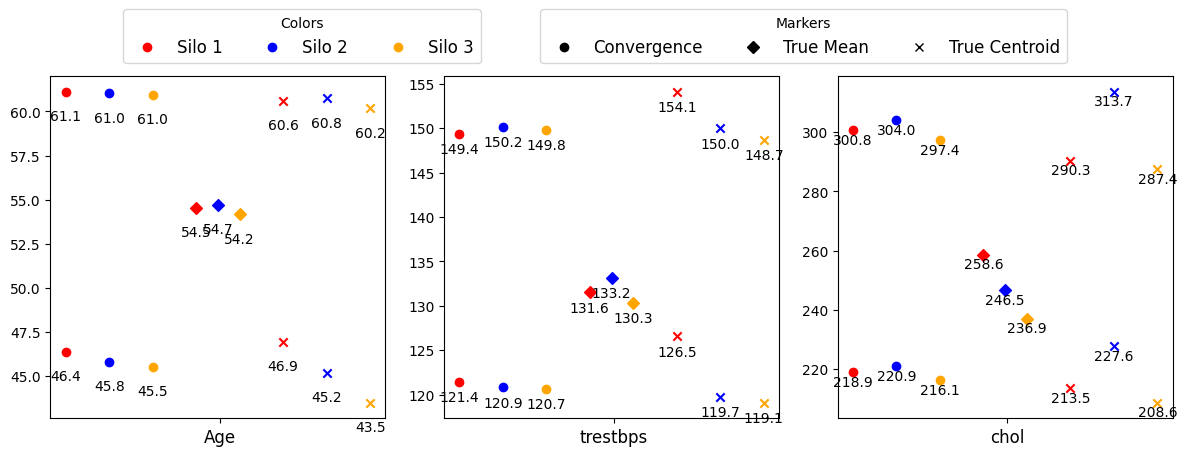

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
x_labels = ["Age", "trestbps", "chol"]  # Single x-label for each plot
x = [1, 2, 3]

s1 = np.concatenate(
    (
        f1[:, 0],
        f2[:, 0],
        f3[:, 0],
        m1,
        m11,
        m13,
        kmm1_age.cluster_centers_[:, 0],
        kmm2_age.cluster_centers_[:, 0],
        kmm3_age.cluster_centers_[:, 0],
    ),
    axis=0,
)
s2 = np.concatenate(
    (
        f1[:, 1],
        f2[:, 1],
        f3[:, 1],
        m2,
        m21,
        m23,
        kmm1_threspt.cluster_centers_[:, 0],
        kmm2_threspt.cluster_centers_[:, 0],
        kmm3_threspt.cluster_centers_[:, 0],
    ),
    axis=0,
)
s3 = np.concatenate(
    (
        f1[:, 2],
        f2[:, 2],
        f3[:, 2],
        m3,
        m31,
        m33,
        kmm1_chol.cluster_centers_[:, 0],
        kmm2_chol.cluster_centers_[:, 0],
        kmm3_chol.cluster_centers_[:, 0],
    ),
    axis=0,
)

SIZE = 45

s1_ = s1.reshape(-1, 1)
s2_ = s2.reshape(-1, 1)
s3_ = s3.reshape(-1, 1)

# Define colors for each convergence
label_colors = {
    "Age": [
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
        "red",
        "blue",
        "orange",
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
    ],
    "trestbps": [
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
        "red",
        "blue",
        "orange",
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
    ],
    "chol": [
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
        "red",
        "blue",
        "orange",
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
    ],
}

color_labels = {
    "red": "Silo 1",
    "blue": "Silo 2",
    "orange": "Silo 3",
}

marker_labels = {
    "o": "Convergence",
    "D": "True Mean",
    "x": "True Centroid",
}
label_markers = {
    "Age": ["o", "o", "o", "o", "o", "o", "D", "D", "D", "x", "x", "x", "x", "x", "x"],
    "trestbps": [
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "D",
        "D",
        "D",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
    ],
    "chol": ["o", "o", "o", "o", "o", "o", "D", "D", "D", "x", "x", "x", "x", "x", "x"],
}

x = [1, 1, 2, 2, 3, 3, 4, 4.5, 5, 6, 6, 7, 7, 8, 8]
# Create subplots for individual features
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

for i, (data, ax, label) in enumerate(
    zip(
        [s1_, s2_, s3_],
        axes,
        x_labels,
    )
):
    for j, (point, color, marker) in enumerate(
        zip(data.flatten(), label_colors[label], label_markers[label])
    ):
        ax.scatter(x[j] - 0.05, point, c=color, marker=marker)
        ax.text(
            x[j] - 0.05,  # x-coordinate of the point
            point - 1,  # y-coordinate of the point
            f"{point:.1f}",  # Format the value (e.g., two decimals)
            fontsize=10,  # Font size of the text
            ha="center",  # Horizontal alignment
            va="top",  # Vertical alignment
        )
    ax.set_xticks([4.5])
    ax.set_xticklabels([label], fontsize=12)

# Create legends for colors and markers
color_handles = [
    plt.Line2D([0], [0], marker="o", color=color, linestyle="", markersize=6)
    for color in color_labels.keys()
]
color_legend = [desc for desc in color_labels.values()]

marker_handles = [
    plt.Line2D([0], [0], marker=marker, color="black", linestyle="", markersize=6)
    for marker in marker_labels.keys()
]
marker_legend = [desc for desc in marker_labels.values()]
# Add legends to the figure
fig.legend(
    color_handles,
    color_legend,
    loc="upper left",
    bbox_to_anchor=(0.1, 1.15),
    fontsize=12,
    title="Colors",
    ncol=len(color_legend),  # Make legend items appear in one row
)
fig.legend(
    marker_handles,
    marker_legend,
    loc="upper right",
    bbox_to_anchor=(0.9, 1.15),
    fontsize=12,
    title="Markers",
    ncol=len(marker_legend),  # Make legend items appear in one row
)

plt.tight_layout()
plt.savefig("../Vizs/my_cluster_single_x_per_plot_with_legend.png", bbox_inches="tight")
plt.show()


# test with ordinal encoder

In [27]:
nsilo1 = silo1.copy()
nsilo2 = silo2.copy()
nsilo3 = silo3.copy()


In [28]:
nsilo1["sex"] = nsilo1["sex"].replace({1.0: "Male", 0.0: "Female"})
nsilo2["sex"] = nsilo2["sex"].replace({1.0: "Male", 0.0: "Female"})
nsilo3["sex"] = nsilo3["sex"].replace({1.0: "Male", 0.0: "Female"})


In [29]:
nsilo1["cp"] = nsilo1["cp"].replace(
    {
        "1.0": "typical angina",
        "2.0": "atypical angina",
        "3.0": "non-anginal pain",
        "4.0": "asymptomatic",
    }
)
nsilo2["cp"] = nsilo2["cp"].replace(
    {
        "1.0": "typical angina",
        "2.0": "atypical angina",
        "3.0": "non-anginal pain",
        "4.0": "asymptomatic",
    }
)
nsilo3["cp"] = nsilo3["cp"].replace(
    {
        "1.0": "typical angina",
        "2.0": "atypical angina",
        "3.0": "non-anginal pain",
        "4.0": "asymptomatic",
    }
)


In [30]:
nsilo1["cp"].value_counts()

cp
asymptomatic        45
non-anginal pain    35
atypical angina     13
typical angina       7
Name: count, dtype: int64

In [31]:
nsilo1["slope"] = nsilo1["slope"].replace(
    {"1.0": "upsloping", "3.0": "downsloping", "2.0": "flat"}
)
nsilo2["slope"] = nsilo2["slope"].replace(
    {"1.0": "upsloping", "3.0": "downsloping", "2.0": "flat"}
)
nsilo3["slope"] = nsilo3["slope"].replace(
    {"1.0": "upsloping", "3.0": "downsloping", "2.0": "flat"}
)


In [32]:
nsilo1[["sex", "slope", "cp"]]

,sex,slope,cp
0,Male,downsloping,typical angina
1,Male,flat,asymptomatic
2,Male,flat,asymptomatic
3,Male,downsloping,non-anginal pain
4,Female,upsloping,atypical angina
...,...,...,...
95,Male,upsloping,asymptomatic
96,Male,flat,asymptomatic
97,Female,flat,asymptomatic
98,Male,upsloping,atypical angina


In [33]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(nsilo1[["sex", "slope", "cp"]])
nsilo1[["sex", "slope", "cp"]] = enc.transform(nsilo1[["sex", "slope", "cp"]])
nsilo2[["sex", "slope", "cp"]] = enc.transform(nsilo2[["sex", "slope", "cp"]])
nsilo3[["sex", "slope", "cp"]] = enc.transform(nsilo3[["sex", "slope", "cp"]])

In [34]:
mapping = {category: idx for idx, category in enumerate(enc.categories_[1])}
mapping

{'downsloping': 0, 'flat': 1, 'upsloping': 2}

In [35]:
nsilo1[["sex", "slope", "cp"]]

,sex,slope,cp
0,1.0,0.0,3.0
1,1.0,1.0,0.0
2,1.0,1.0,0.0
3,1.0,0.0,2.0
4,0.0,2.0,1.0
...,...,...,...
95,1.0,2.0,0.0
96,1.0,1.0,0.0
97,0.0,1.0,0.0
98,1.0,2.0,1.0


In [36]:
f1_encoded, f2_encoded, f3_encoded = mock_data_transfer_and_convergence(
    20, 0.9, ["sex", "slope", "cp"], silos=[nsilo1, nsilo2, nsilo3]
)

0.45604802157206864
clusters [[ 1.00000000e+00]
 [-5.55111512e-16]]
noised_init [[1.11401201]
 [0.11401201]]
[[1.11401201 0.         0.        ]
 [0.11401201 0.         0.        ]]
0.680092091209163
clusters [[2.  ]
 [0.78]]
noised_init [[2.17002302]
 [0.95002302]]
[[1.11401201 2.17002302 0.        ]
 [0.11401201 0.95002302 0.        ]]
1.0436919705032366
clusters [[0.22413793]
 [2.16666667]]
noised_init [[0.48506092]
 [2.42758966]]
[[1.11401201 2.17002302 0.48506092]
 [0.11401201 0.95002302 2.42758966]]
0.45126085985421294
clusters [[1.]
 [0.]]
noised_init [[1.11281521]
 [0.11281521]]
[[1.11281521 0.         0.        ]
 [0.11281521 0.         0.        ]]
0.5949280577846315
clusters [[0.89655172]
 [2.        ]]
noised_init [[0.74781971]
 [1.85126799]]
[[1.11281521 0.74781971 0.        ]
 [0.11281521 1.85126799 0.        ]]
1.0539008827717484
clusters [[0.265625]
 [2.25    ]]
noised_init [[0.00214978]
 [1.98652478]]
[[1.11281521 0.74781971 0.00214978]
 [0.11281521 1.85126799 1.986524

In [37]:
f1_encoded, f2_encoded, f3_encoded

(array([[1.00003502e+00, 8.44517808e-01, 2.46306911e-01],
        [3.50227591e-05, 1.99998772e+00, 2.20414122e+00]]),
 array([[1.00003502e+00, 8.73655739e-01, 2.56678678e-01],
        [3.50227587e-05, 1.99998772e+00, 2.22497455e+00]]),
 array([[1.00003502e+00, 8.79909965e-01, 2.58129571e-01],
        [3.50227615e-05, 1.99998772e+00, 2.22080789e+00]]))

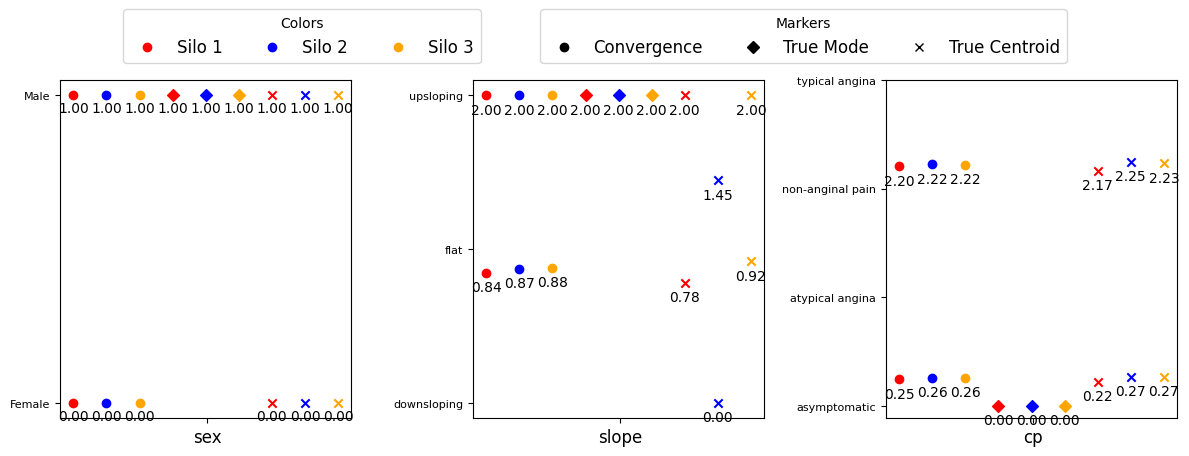

In [38]:
import numpy as np
import matplotlib.pyplot as plt

y_tick_values_dict = {
    "sex": [0, 1],
    "slope": [2, 1, 0],
    "cp": [3, 1, 2, 0],
}  # Example numeric values in the y-axis
y_tick_labels_dict = {
    "sex": [
        "Female",
        "Male",
    ],
    "slope": ["upsloping", "flat", "downsloping"],
    "cp": ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"],
}
# Data preparation
x_labels = ["sex", "slope", "cp"]  # Single x-label for each plot
x = [1, 2, 3]

mode11 = nsilo1["sex"].mode()
mode12 = nsilo2["sex"].mode()
mode13 = nsilo3["sex"].mode()

mode21 = nsilo1["slope"].mode()
mode22 = nsilo2["slope"].mode()
mode23 = nsilo3["slope"].mode()

mode31 = nsilo1["cp"].mode()
mode32 = nsilo2["cp"].mode()
mode33 = nsilo3["cp"].mode()


kmm2_sex = KMeans(n_clusters=2, random_state=0).fit(np.array(nsilo2[["sex"]]))
kmm2_slope = KMeans(n_clusters=2, random_state=0).fit(np.array(nsilo2[["slope"]]))
kmm2_cp = KMeans(n_clusters=2, random_state=0).fit(np.array(nsilo2[["cp"]]))


kmm3_sex = KMeans(n_clusters=2, random_state=0).fit(np.array(nsilo3[["sex"]]))
kmm3_slope = KMeans(n_clusters=2, random_state=0).fit(np.array(nsilo3[["slope"]]))
kmm3_cp = KMeans(n_clusters=2, random_state=0).fit(np.array(nsilo3[["cp"]]))


kmm1_sex = KMeans(n_clusters=2, random_state=0).fit(np.array(nsilo1[["sex"]]))
kmm1_slope = KMeans(n_clusters=2, random_state=0).fit(np.array(nsilo1[["slope"]]))
kmm1_cp = KMeans(n_clusters=2, random_state=0).fit(np.array(nsilo1[["cp"]]))


s1 = np.concatenate(
    (
        f1_encoded[:, 0],
        f2_encoded[:, 0],
        f3_encoded[:, 0],
        mode11,
        mode11,
        mode13,
        kmm1_sex.cluster_centers_[:, 0],
        kmm2_sex.cluster_centers_[:, 0],
        kmm3_sex.cluster_centers_[:, 0],
    ),
    axis=0,
)
s2 = np.concatenate(
    (
        f1_encoded[:, 1],
        f2_encoded[:, 1],
        f3_encoded[:, 1],
        mode21,
        mode21,
        mode23,
        kmm1_slope.cluster_centers_[:, 0],
        kmm2_slope.cluster_centers_[:, 0],
        kmm3_slope.cluster_centers_[:, 0],
    ),
    axis=0,
)
s3 = np.concatenate(
    (
        f1_encoded[:, 2],
        f2_encoded[:, 2],
        f3_encoded[:, 2],
        mode31,
        mode32,
        mode33,
        kmm1_cp.cluster_centers_[:, 0],
        kmm2_cp.cluster_centers_[:, 0],
        kmm3_cp.cluster_centers_[:, 0],
    ),
    axis=0,
)

SIZE = 45

s1_ = s1.reshape(-1, 1)
s2_ = s2.reshape(-1, 1)
s3_ = s3.reshape(-1, 1)

# Define colors for each convergence
label_colors = {
    "sex": [
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
        "red",
        "blue",
        "orange",
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
    ],
    "slope": [
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
        "red",
        "blue",
        "orange",
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
    ],
    "cp": [
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
        "red",
        "blue",
        "orange",
        "red",
        "red",
        "blue",
        "blue",
        "orange",
        "orange",
    ],
}

color_labels = {
    "red": "Silo 1",
    "blue": "Silo 2",
    "orange": "Silo 3",
}

marker_labels = {
    "o": "Convergence",
    "D": "True Mode",
    "x": "True Centroid",
}
label_markers = {
    "sex": ["o", "o", "o", "o", "o", "o", "D", "D", "D", "x", "x", "x", "x", "x", "x"],
    "slope": [
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "D",
        "D",
        "D",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
    ],
    "cp": ["o", "o", "o", "o", "o", "o", "D", "D", "D", "x", "x", "x", "x", "x", "x"],
}
limits_points = {"sex": 0.02, "slope": 0.05, "cp": 0.07}

x = [1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9]
# Create subplots for individual features
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

for i, (data, ax, label) in enumerate(
    zip(
        [s1_, s2_, s3_],
        axes,
        x_labels,
    )
):
    for j, (point, color, marker) in enumerate(
        zip(data.flatten(), label_colors[label], label_markers[label])
    ):
        ax.scatter(x[j] - 0.05, point, c=color, marker=marker)
        ax.text(
            x[j] - 0.05,  # x-coordinate of the point
            point - limits_points[label],  # y-coordinate of the point
            f"{abs(point):.2f}",  # Format the value (e.g., two decimals)
            fontsize=10,  # Font size of the text
            ha="center",  # Horizontal alignment
            va="top",  # Vertical alignment
        )
    ax.set_xticks([5])
    ax.set_xticklabels([label], fontsize=12)

    # Update the y-ticks to words
    ax.set_yticks(y_tick_values_dict[label])
    ax.set_yticklabels(
        y_tick_labels_dict[label], fontsize=8
    )  # Adjust fontsize if needed
# Create legends for colors and markers
color_handles = [
    plt.Line2D([0], [0], marker="o", color=color, linestyle="", markersize=6)
    for color in color_labels.keys()
]
color_legend = [desc for desc in color_labels.values()]

marker_handles = [
    plt.Line2D([0], [0], marker=marker, color="black", linestyle="", markersize=6)
    for marker in marker_labels.keys()
]
marker_legend = [desc for desc in marker_labels.values()]
# Add legends to the figure
fig.legend(
    color_handles,
    color_legend,
    loc="upper left",
    bbox_to_anchor=(0.1, 1.15),
    fontsize=12,
    title="Colors",
    ncol=len(color_legend),  # Make legend items appear in one row
)
fig.legend(
    marker_handles,
    marker_legend,
    loc="upper right",
    bbox_to_anchor=(0.9, 1.15),
    fontsize=12,
    title="Markers",
    ncol=len(marker_legend),  # Make legend items appear in one row
)

plt.tight_layout()
plt.savefig(
    "../Vizs/my_cluster_single_x_per_plot_with_legend_encoded.png", bbox_inches="tight"
)
plt.show()

# test with one hot enconder

In [39]:
nnsilo1 = silo1.copy()
nnsilo2 = silo2.copy()
nnsilo3 = silo3.copy()


In [40]:
nnsilo1["sex"] = nnsilo1["sex"].replace({1.0: "Male", 0.0: "Female"})
nnsilo2["sex"] = nnsilo2["sex"].replace({1.0: "Male", 0.0: "Female"})
nnsilo3["sex"] = nnsilo3["sex"].replace({1.0: "Male", 0.0: "Female"})


In [41]:
nnsilo1["cp"] = nnsilo1["cp"].replace(
    {
        "1.0": "typical angina",
        "2.0": "atypical angina",
        "3.0": "non-anginal pain",
        "4.0": "asymptomatic",
    }
)
nnsilo2["cp"] = nnsilo2["cp"].replace(
    {
        "1.0": "typical angina",
        "2.0": "atypical angina",
        "3.0": "non-anginal pain",
        "4.0": "asymptomatic",
    }
)
nnsilo3["cp"] = nnsilo3["cp"].replace(
    {
        "1.0": "typical angina",
        "2.0": "atypical angina",
        "3.0": "non-anginal pain",
        "4.0": "asymptomatic",
    }
)


In [42]:
nnsilo1["cp"].value_counts()

cp
asymptomatic        45
non-anginal pain    35
atypical angina     13
typical angina       7
Name: count, dtype: int64

In [43]:
nnsilo1["slope"] = nnsilo1["slope"].replace(
    {"1.0": "upsloping", "3.0": "downsloping", "2.0": "flat"}
)
nnsilo2["slope"] = nnsilo2["slope"].replace(
    {"1.0": "upsloping", "3.0": "downsloping", "2.0": "flat"}
)
nnsilo3["slope"] = nnsilo3["slope"].replace(
    {"1.0": "upsloping", "3.0": "downsloping", "2.0": "flat"}
)


In [44]:
nnsilo1[["sex", "slope", "cp"]]

,sex,slope,cp
0,Male,downsloping,typical angina
1,Male,flat,asymptomatic
2,Male,flat,asymptomatic
3,Male,downsloping,non-anginal pain
4,Female,upsloping,atypical angina
...,...,...,...
95,Male,upsloping,asymptomatic
96,Male,flat,asymptomatic
97,Female,flat,asymptomatic
98,Male,upsloping,atypical angina


In [45]:
from sklearn.preprocessing import OneHotEncoder

enc2 = OneHotEncoder()
enc2.fit(nnsilo1[["sex", "slope", "cp"]])
nnsilo1_encoded = enc2.transform(nnsilo1[["sex", "slope", "cp"]])
nnsilo2_encoded = enc2.transform(nnsilo2[["sex", "slope", "cp"]])
nnsilo3_encoded = enc2.transform(nnsilo3[["sex", "slope", "cp"]])

In [46]:
nnsilo1_df_encoded = pd.DataFrame(
    nnsilo1_encoded.toarray(),
    columns=enc2.get_feature_names_out(["sex", "slope", "cp"]),
)
nnsilo2_df_encoded = pd.DataFrame(
    nnsilo2_encoded.toarray(),
    columns=enc2.get_feature_names_out(["sex", "slope", "cp"]),
)
nnsilo3_df_encoded = pd.DataFrame(
    nnsilo3_encoded.toarray(),
    columns=enc2.get_feature_names_out(["sex", "slope", "cp"]),
)
nnsilo1_df_encoded

,sex_Female,sex_Male,slope_downsloping,slope_flat,slope_upsloping,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,cp_typical angina
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
96,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
97,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
98,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [47]:
nnsilo1_df_encoded.columns

Index(['sex_Female', 'sex_Male', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal pain', 'cp_typical angina'],
      dtype='object')

In [48]:
f1_encoded_onehot, f2_encoded_onehot, f3_encoded_onehot = (
    mock_data_transfer_and_convergence(
        20,
        0.9,
        [
            "sex_Female",
            "sex_Male",
            "slope_downsloping",
            "slope_flat",
            "slope_upsloping",
            "cp_asymptomatic",
            "cp_atypical angina",
            "cp_non-anginal pain",
            "cp_typical angina",
        ],
        silos=[nnsilo1_df_encoded, nnsilo2_df_encoded, nnsilo3_df_encoded],
    )
)

0.4560480215720686
clusters [[4.99600361e-16]
 [1.00000000e+00]]
noised_init [[-0.11401201]
 [ 0.88598799]]
[[-0.11401201  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.88598799  0.          0.          0.          0.          0.
   0.          0.          0.        ]]
0.45604802157206864
clusters [[ 1.00000000e+00]
 [-5.55111512e-16]]
noised_init [[ 0.88598799]
 [-0.11401201]]
[[-0.11401201  0.88598799  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.88598799 -0.11401201  0.          0.          0.          0.
   0.          0.          0.        ]]
0.31446603773522014
clusters [[0.]
 [1.]]
noised_init [[-0.07861651]
 [ 0.92138349]]
[[-0.11401201  0.88598799 -0.07861651  0.          0.          0.
   0.          0.          0.        ]
 [ 0.88598799 -0.11401201  0.92138349  0.          0.          0.
   0.          0.          0.        ]]
0.4902071300001973
clusters [[-3.33066907e-16]
 [ 1.00000000e+0

In [49]:
f1_encoded_onehot, f2_encoded_onehot, f3_encoded_onehot

(array([[-3.50227591e-05,  9.99964977e-01,  1.00000304e+00,
          1.28692135e-05,  1.24286779e-05,  1.00001251e+00,
          8.89030038e-06,  3.37949144e-05, -2.00608135e-05],
        [ 9.99964977e-01, -3.50227591e-05,  3.03642192e-06,
          1.00001287e+00,  1.00001243e+00,  1.25102150e-05,
          1.00000889e+00,  1.00003379e+00,  9.99979939e-01]]),
 array([[-3.50227587e-05,  9.99964977e-01,  1.00000304e+00,
          1.28692847e-05,  1.24287495e-05,  1.00001251e+00,
          8.89024908e-06,  3.37949120e-05, -2.00608157e-05],
        [ 9.99964977e-01, -3.50227587e-05,  3.03646158e-06,
          1.00001287e+00,  1.00001243e+00,  1.25102151e-05,
          1.00000889e+00,  1.00003379e+00,  9.99979939e-01]]),
 array([[-3.50227615e-05,  9.99964977e-01,  3.03645859e-06,
          1.00001287e+00,  1.24287500e-05,  1.00001251e+00,
          8.89030441e-06,  3.37949104e-05, -2.00608135e-05],
        [ 9.99964977e-01, -3.50227615e-05,  1.00000304e+00,
          1.28692847e-05,  1.00

In [50]:
kmm1_sex = KMeans(n_clusters=2, random_state=0).fit(
    np.array(nnsilo1_df_encoded[["cp_atypical angina"]])
)
kmm1_sex.cluster_centers_

array([[-1.66533454e-16],
       [ 1.00000000e+00]])

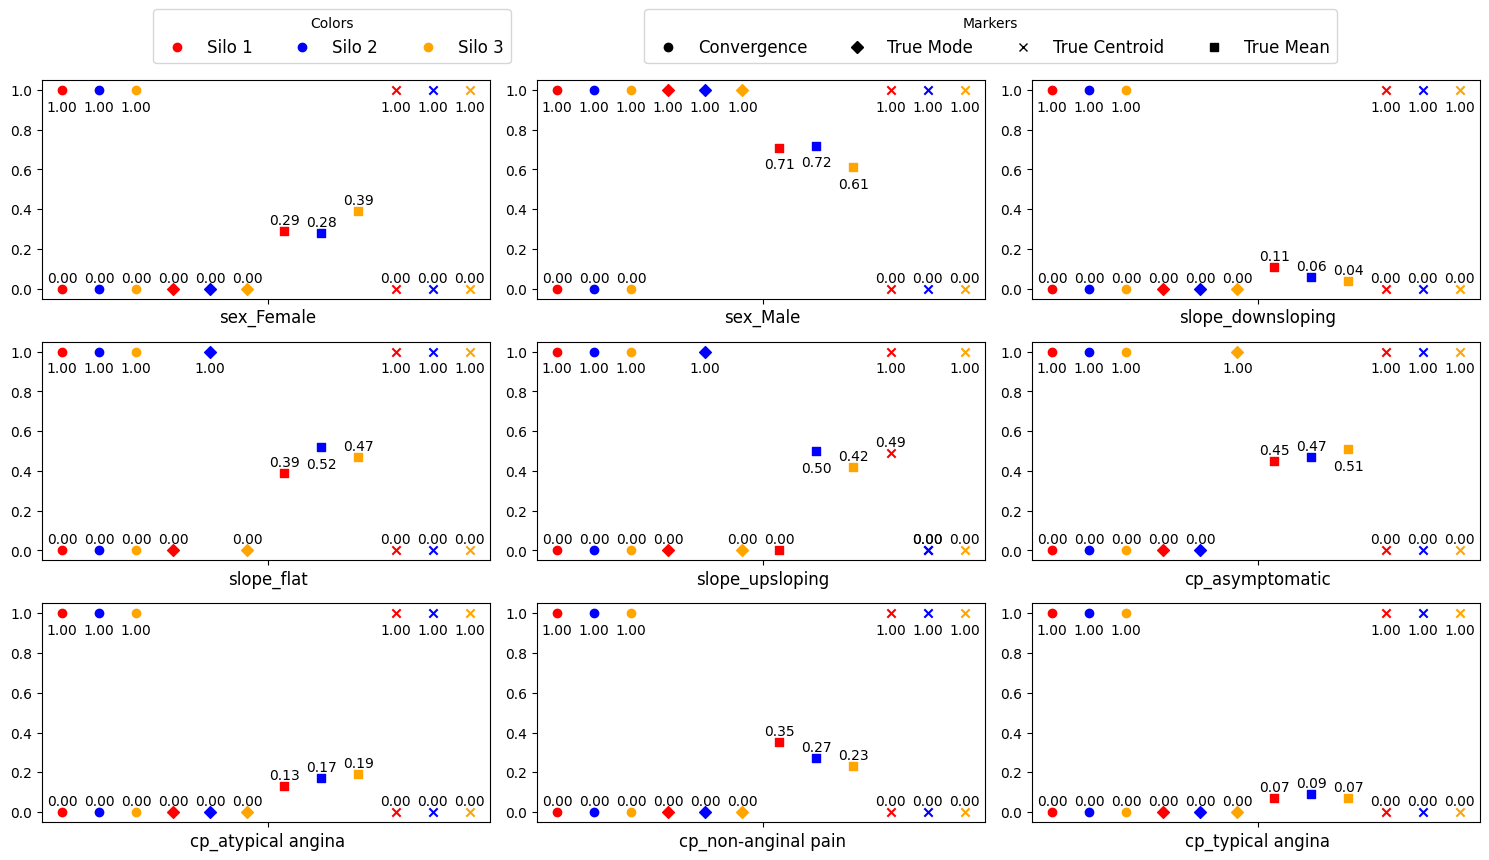

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_tick_values_dict = {
    "sex": [0, 1],
    "slope": [2, 1, 0],
    "cp": [3, 1, 2, 0],
}  # Example numeric values in the y-axis
y_tick_labels_dict = {
    "sex": [
        "Female",
        "Male",
    ],
    "slope": ["upsloping", "flat", "downsloping"],
    "cp": ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"],
}
# Data preparation
x_labels = [
    "sex_Female",
    "sex_Male",
    "slope_downsloping",
    "slope_flat",
    "slope_upsloping",
    "cp_asymptomatic",
    "cp_atypical angina",
    "cp_non-anginal pain",
    "cp_typical angina",
]  # Single x-label for each plot
x = [1, 2, 3]


s_concats = []
for n, name in enumerate(x_labels):
    mode1 = nnsilo1_df_encoded[name].mode()
    mode2 = nnsilo2_df_encoded[name].mode()
    mode3 = nnsilo3_df_encoded[name].mode()
    # print(mode1, mode2, mode3)
    mean1 = nnsilo1_df_encoded[name].mean()
    mean2 = nnsilo2_df_encoded[name].mean()
    mean3 = nnsilo3_df_encoded[name].mean()
    # print(mean1, mean2, mean3)
    kmm1_sex = KMeans(n_clusters=2, random_state=0).fit(
        np.array(nnsilo1_df_encoded[[name]])
    )
    kmm2_sex = KMeans(n_clusters=2, random_state=0).fit(
        np.array(nnsilo2_df_encoded[[name]])
    )
    kmm3_sex = KMeans(n_clusters=2, random_state=0).fit(
        np.array(nnsilo3_df_encoded[[name]])
    )

    s_concats.append(
        np.concatenate(
            (
                f1_encoded_onehot[:, n],
                f2_encoded_onehot[:, n],
                f3_encoded_onehot[:, n],
                mode1,
                mode2,
                mode3,
                [mean1],
                [mean2],
                [mean3],
                kmm1_sex.cluster_centers_[:, 0],
                kmm2_sex.cluster_centers_[:, 0],
                kmm3_sex.cluster_centers_[:, 0],
            ),
            axis=0,
        )
    )


# Define colors for each convergence
label_colors = [
    "red",
    "red",
    "blue",
    "blue",
    "orange",
    "orange",
    "red",
    "blue",
    "orange",
    "red",
    "blue",
    "orange",
    "red",
    "red",
    "blue",
    "blue",
    "orange",
    "orange",
]

color_labels = {
    "red": "Silo 1",
    "blue": "Silo 2",
    "orange": "Silo 3",
}

marker_labels = {
    "o": "Convergence",
    "D": "True Mode",
    "x": "True Centroid",
    "s": "True Mean",
}
label_markers = [
    "o",
    "o",
    "o",
    "o",
    "o",
    "o",
    "D",
    "D",
    "D",
    "s",
    "s",
    "s",
    "x",
    "x",
    "x",
    "x",
    "x",
    "x",
]

x = [1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 11, 12, 12]
# Create subplots for individual features
fig, axes = plt.subplots(3, 3, figsize=(15, 8), sharey=False)

for i, (data, ax, label) in enumerate(
    zip(
        s_concats,
        axes.flatten(),
        x_labels,
    )
):
    for j, (point, color, marker) in enumerate(
        zip(data.flatten(), label_colors, label_markers)
    ):
        #   print(ax)
        #   print(x[j])
        #   print(point)
        ax.scatter(x[j] - 0.05, point, c=color, marker=marker)
        if point < 0.5:
            va = "top"
            offset = point + 0.09
        else:
            va = "top"
            offset = point - 0.05
        ax.text(
            x[j] - 0.05,  # x-coordinate of the point
            offset,  # y-coordinate of the point
            f"{abs(point):.2f}",  # Format the value (e.g., two decimals)
            fontsize=10,  # Font size of the text
            ha="center",  # Horizontal alignment
            va=va,  # Vertical alignment
        )
    ax.set_xticks([6.5])
    ax.set_xticklabels([label], fontsize=12)

    # Update the y-ticks to words

# Create legends for colors and markers
color_handles = [
    plt.Line2D([0], [0], marker="o", color=color, linestyle="", markersize=6)
    for color in color_labels.keys()
]
color_legend = [desc for desc in color_labels.values()]

marker_handles = [
    plt.Line2D([0], [0], marker=marker, color="black", linestyle="", markersize=6)
    for marker in marker_labels.keys()
]
marker_legend = [desc for desc in marker_labels.values()]
# Add legends to the figure
fig.legend(
    color_handles,
    color_legend,
    loc="upper left",
    bbox_to_anchor=(0.1, 1.08),
    fontsize=12,
    title="Colors",
    ncol=len(color_legend),  # Make legend items appear in one row
)
fig.legend(
    marker_handles,
    marker_legend,
    loc="upper right",
    bbox_to_anchor=(0.9, 1.08),
    fontsize=12,
    title="Markers",
    ncol=len(marker_legend),  # Make legend items appear in one row
)

plt.tight_layout()
plt.savefig(
    "../Vizs/my_cluster_single_x_per_plot_with_legend_onehot_encoded.png",
    bbox_inches="tight",
)
plt.show()

# My data

In [62]:
mydata = pd.read_csv(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/imputed/minimumprocesssing_cluster.csv"
)

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_45768/1386330284.py:1: DtypeWarning: Columns (14,40,79) have mixed types. Specify dtype option on import or set low_memory=False.
  mydata = pd.read_csv(


In [63]:
cols_to_use = ["IDADE_MATERNA", "IMC", "TIPO_PARTO_REDUCE"]

In [64]:
selected_mydata = mydata[cols_to_use]

In [65]:
int_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])


categorical_imputer_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        (
            "encoder",
            OrdinalEncoder(),
        ),
    ]
)


pipeline = Pipeline(
    steps=[
        (
            "preprocessor",
            ColumnTransformer(
                transformers=[
                    ("cat", categorical_imputer_transformer, ["TIPO_PARTO_REDUCE"]),
                    ("num", int_imputer, ["IMC", "IDADE_MATERNA"]),
                ]
            ),
        )
    ]
)

In [66]:
mydata_enconded = pipeline.fit_transform(selected_mydata)
df_treated = pd.DataFrame(mydata_enconded, columns=pipeline.get_feature_names_out())
# df_treated.columns = [re.sub("\w+__", "", c) for c in df_treated.columns]

In [67]:
df_treated

,cat__TIPO_PARTO_REDUCE,num__IMC,num__IDADE_MATERNA
0,0.0,27.9,34.0
1,1.0,22.8,24.0
2,1.0,24.7,36.0
3,1.0,27.2,33.0
4,1.0,35.6,41.0
...,...,...,...
73346,0.0,22.0,34.0
73347,1.0,22.1,27.0
73348,1.0,25.7,28.0
73349,2.0,20.0,31.0


In [68]:
CHSJ = df_treated[mydata["silo"] == "CHSJ"]
HSO = df_treated[mydata["silo"] == "HSO"]
CHTS = df_treated[mydata["silo"] == "CHTS"]
ULSAM = df_treated[mydata["silo"] == "ULSAM"]
CHEDV = df_treated[mydata["silo"] == "CHEDV"]
CHVNG = df_treated[mydata["silo"] == "CHVNGE"]
ULSM = df_treated[mydata["silo"] == "ULSM"]
CHBV = df_treated[mydata["silo"] == "CHBV"]
CHLN = df_treated[mydata["silo"] == "CHLN"]


In [69]:
# 3. repetir envio até:
#    3.1 medida de concordancia que é matrix confusão de todos os pares de pontos e cujo centroide estao associados


def mock_data_transfer_and_convergence_9silos(
    limit_after_convergence, threshold, cols_used, clusters=2
):
    c1 = create_initializer(CHSJ, cols_used, clusters)
    c2 = create_initializer(HSO, cols_used, clusters)
    c3 = create_initializer(CHTS, cols_used, clusters)
    c4 = create_initializer(ULSAM, cols_used, clusters)
    c5 = create_initializer(CHEDV, cols_used, clusters)
    c6 = create_initializer(CHVNG, cols_used, clusters)
    c7 = create_initializer(ULSM, cols_used, clusters)
    c8 = create_initializer(CHBV, cols_used, clusters)
    c9 = create_initializer(CHLN, cols_used, clusters)

    print("inits; ", c1, c2, c3)
    old_preds_1 = old_preds_2 = old_preds_3 = old_preds_4 = old_preds_5 = (
        old_preds_6
    ) = old_preds_7 = old_preds_8 = old_preds_9 = None
    convergence = False
    last_significance_round = 0
    while not convergence and last_significance_round < limit_after_convergence:
        nc1, old_preds_1, score_1 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c2, c3, c4, c5, c6, c7, c8, c9],
            mydata=CHSJ,
            cols=cols_used,
            old_preds=old_preds_1,
        )
        nc2, old_preds_2, score_2 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c3, c4, c5, c6, c7, c8, c9],
            mydata=HSO,
            cols=cols_used,
            old_preds=old_preds_2,
        )
        nc3, old_preds_3, score_3 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c2, c4, c5, c6, c7, c8, c9],
            mydata=CHTS,
            cols=cols_used,
            old_preds=old_preds_3,
        )
        nc4, old_preds_4, score_4 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c2, c3, c5, c6, c7, c8, c9],
            mydata=ULSAM,
            cols=cols_used,
            old_preds=old_preds_4,
        )
        nc5, old_preds_5, score_5 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c2, c3, c4, c6, c7, c8, c9],
            mydata=CHEDV,
            cols=cols_used,
            old_preds=old_preds_5,
        )
        nc6, old_preds_6, score_6 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c2, c3, c4, c5, c7, c8, c9],
            mydata=CHVNG,
            cols=cols_used,
            old_preds=old_preds_6,
        )
        nc7, old_preds_7, score_7 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c2, c3, c4, c5, c6, c8, c9],
            mydata=ULSM,
            cols=cols_used,
            old_preds=old_preds_7,
        )
        nc8, old_preds_8, score_8 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c2, c3, c4, c5, c6, c7, c9],
            mydata=CHBV,
            cols=cols_used,
            old_preds=old_preds_8,
        )
        nc9, old_preds_9, score_9 = calculate_centroids_and_score(
            clusters=clusters,
            other_centroids=[c1, c2, c3, c4, c5, c6, c7, c8],
            mydata=CHLN,
            cols=cols_used,
            old_preds=old_preds_9,
        )

        c1 = nc1
        c2 = nc2
        c3 = nc3
        c4 = nc4
        c5 = nc5
        c6 = nc6
        c7 = nc7
        c8 = nc8
        c9 = nc9

        print("new centroids c1; ", c1, "\nc2:", c2, "\nc3", c3)
        # print(score_1,score_2,score_3)
        # print(last_significance_round)
        # if score_1>threshold and score_2>threshold and score_3>threshold:
        if (
            all([s > threshold for s in score_1])
            and all([s > threshold for s in score_2])
            and all([s > threshold for s in score_3])
            and all([s > threshold for s in score_4])
            and all([s > threshold for s in score_5])
            and all([s > threshold for s in score_6])
            and all([s > threshold for s in score_7])
            and all([s > threshold for s in score_8])
            and all([s > threshold for s in score_9])
        ):
            convergence = True
            last_significance_round += 1
        else:
            convergence = False
            last_significance_round = 0
    return nc1, nc2, nc3, nc4, nc5, nc6, nc7, nc8, nc9

In [70]:
xx = mock_data_transfer_and_convergence_9silos(
    20,
    1,
    [
        "num__IMC",
        "num__IDADE_MATERNA",
        "cat__TIPO_PARTO_REDUCE",
    ],
)

7.772277652305414
clusters [[ 24.81949428]
 [391.025     ]]
noised_init [[ 26.76256369]
 [392.96806941]]
[[ 26.76256369   0.           0.        ]
 [392.96806941   0.           0.        ]]
5.6447971333877645
clusters [[26.64194675]
 [35.72836567]]
noised_init [[28.05314603]
 [37.13956495]]
[[ 26.76256369  28.05314603   0.        ]
 [392.96806941  37.13956495   0.        ]]
0.7240438894626672
clusters [[1.34434649e+00]
 [1.77635684e-15]]
noised_init [[ 1.16333551]
 [-0.18101097]]
[[ 2.67625637e+01  2.80531460e+01  1.16333551e+00]
 [ 3.92968069e+02  3.71395650e+01 -1.81010972e-01]]
3.727563930677373
clusters [[23.9224231 ]
 [32.78854167]]
noised_init [[24.85431408]
 [33.72043265]]
[[24.85431408  0.          0.        ]
 [33.72043265  0.          0.        ]]
5.218666992574471
clusters [[34.9306525 ]
 [26.41936808]]
noised_init [[33.62598576]
 [25.11470133]]
[[24.85431408 33.62598576  0.        ]
 [33.72043265 25.11470133  0.        ]]
0.6529754349379542
clusters [[1.21448952e+00]
 [2.22

In [71]:
# true centroids
results = {}
cols = [
    "num__IMC",
    "num__IDADE_MATERNA",
    "cat__TIPO_PARTO_REDUCE",
]
for c in cols:
    results[c] = KMeans(n_clusters=2, random_state=0).fit(
        np.array(df_treated[c]).reshape(-1, 1)
    )


In [88]:
pipeline[0].

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['TIPO_PARTO_REDUCE']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['IMC', 'IDADE_MATERNA'])])

In [102]:
one_hot_encoder = pipeline.named_steps["preprocessor"].named_transformers_["cat"][1]
one_hot_encoder.categories_[0]
# [array(['Cesariana', 'Vaginal', 'auxiliado'], dtype=object)]
mapping = {category: idx for idx, category in enumerate(one_hot_encoder.categories_[0])}
mapping

{'Cesariana': 0, 'Vaginal': 1, 'auxiliado': 2}

{'Cesariana': 0, 'Vaginal': 1, 'auxiliado': 2}

409.58745424962297
410
38.632395660682704
38.6
410.07322160289203
410
38.63805904980683
38.6
410.073221602892
410
38.953942722626266
39.0
410.50399516813263
411
38.894264494542625
38.9
38.971191055271134
39.0
410.07322160289203
410
410.62622216890685
411
38.929186494763854
38.9
409.60824322201364
410
38.63833536708006
38.6
410.50399516813263
411
38.894264494542625
38.9
410.073221602892
410
39.080284780469555
39.1
24.910352861351566
24.9
24.887611162383443
24.9
25.40413151874302
25.4
24.93961827121284
24.9
24.992387100647683
25.0
25.35806718349595
25.4
24.84088856298889
24.8
25.00995268190658
25.0
24.9825171764976
25.0
35.21838117813248
35.2
25.92567617752882
25.9
35.520144070520324
35.5
26.22743906991666
26.2
35.22048952114806
35.2
25.927784520544396
25.9
35.22627591885451
35.2
25.933570918250847
25.9
35.21798963763935
35.2
25.925284637035688
25.9
26.24662103922969
26.2
35.539326039833355
35.5
25.928589966557304
25.9
35.221294967160965
35.2
35.22627591885451
35.2
25.933570918250847
25.

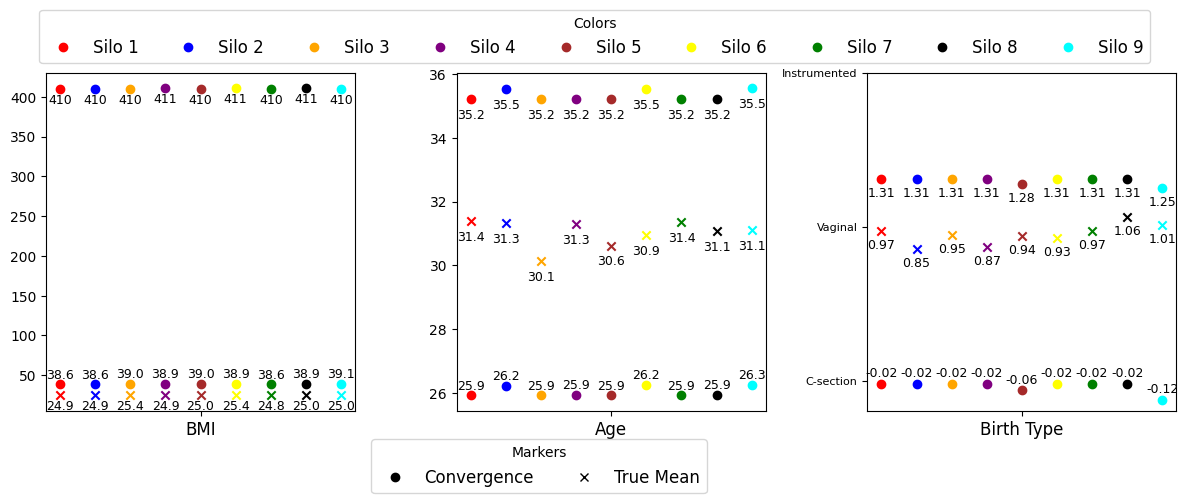

In [127]:
# Data preparation
x_labels = [
    "num__IMC",
    "num__IDADE_MATERNA",
    "cat__TIPO_PARTO_REDUCE",
]  # Single x-label for each plot

worded_label = {
    "num__IMC": "BMI",
    "num__PESO_INICIAL": "Initial Weigth",
    "num__IDADE_MATERNA": "Age",
    "cat__TIPO_PARTO_REDUCE": "Birth Type",
}


def get_offset(label, point):
    if label == "num__IMC":
        if point > 30 and point < 100:
            return "top", point + 20.05
        else:
            return "top", point - 6
    elif label == "cat__TIPO_PARTO_REDUCE":
        if point > 0.5:
            return "top", point - 0.05
        else:
            return "top", point + 0.11
    elif label == "num__IDADE_MATERNA":
        if point > 28:
            return "top", point - 0.3
        else:
            return "top", point + 0.5
    else:
        return "top", point - 0.05


s_concats = []
for n, name in enumerate(x_labels):
    # # print(mode1, mode2, mode3)
    mean1 = CHSJ[name].mean()
    mean2 = HSO[name].mean()
    mean3 = CHTS[name].mean()
    mean4 = ULSAM[name].mean()
    mean5 = CHEDV[name].mean()
    mean6 = CHVNG[name].mean()
    mean7 = ULSM[name].mean()
    mean8 = CHBV[name].mean()
    mean9 = CHLN[name].mean()

    s_concats.append(
        np.concatenate(
            (
                xx[0][:, n],
                xx[1][:, n],
                xx[2][:, n],
                xx[3][:, n],
                xx[4][:, n],
                xx[5][:, n],
                xx[6][:, n],
                xx[3][:, n],
                xx[8][:, n],
                [mean1],
                [mean2],
                [mean3],
                [mean4],
                [mean5],
                [mean6],
                [mean7],
                [mean8],
                [mean9],
            ),
            axis=0,
        )
    )

# print(len(s_concats[0]))
# Define colors for each convergence
label_colors = [
    "red",
    "red",
    "blue",
    "blue",
    "orange",
    "orange",
    "purple",
    "purple",
    "brown",
    "brown",
    "yellow",
    "yellow",
    "green",
    "green",
    "black",
    "black",
    "cyan",
    "cyan",
    "red",
    "blue",
    "orange",
    "purple",
    "brown",
    "yellow",
    "green",
    "black",
    "cyan",
]

color_labels = {
    "red": "Silo 1",
    "blue": "Silo 2",
    "orange": "Silo 3",
    "purple": "Silo 4",
    "brown": "Silo 5",
    "yellow": "Silo 6",
    "green": "Silo 7",
    "black": "Silo 8",
    "cyan": "Silo 9",
}

marker_labels = {
    "o": "Convergence",
    "x": "True Mean",
}
label_markers = ["o"] * 18 + ["x"] * 9


x = [
    1,
    1,
    2,
    2,
    3,
    3,
    4,
    4,
    5,
    5,
    6,
    6,
    7,
    7,
    8,
    8,
    9,
    9,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
]
# Create subplots for individual features
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

for i, (data, ax, label) in enumerate(
    zip(
        s_concats,
        axes.flatten(),
        x_labels,
    )
):
    for j, (point, color, marker) in enumerate(
        zip(data.flatten(), label_colors, label_markers)
    ):
        #   print(ax)
        #   print(x[j])
        print(point)
        ax.scatter(x[j], point, c=color, marker=marker)
        va, offset = get_offset(label, point)
        # print(offset)
        if point > 100:
            format = f"{point:.0f}"
        elif point > 2:
            format = f"{point:.1f}"
        else:
            format = f"{point:.2f}"
        print(format)
        ax.text(
            x[j],  # x-coordinate of the point
            offset,  # y-coordinate of the point
            format,  # Format the value (e.g., two decimals)
            fontsize=9,  # Font size of the text
            ha="center",  # Horizontal alignment
            va=va,  # Vertical alignment
        )
    ax.set_xticks([5])
    ax.set_xticklabels([worded_label[label]], fontsize=12)
    if label == "cat__TIPO_PARTO_REDUCE":
        ax.set_yticks([0, 1, 2])
        # {'Cesariana': 0, 'Vaginal': 1, 'auxiliado': 2}

        ax.set_yticklabels(
            [
                "C-section",
                "Vaginal",
                "Instrumented",
            ],
            fontsize=8,
        )  # Adjust fontsize if needed
    # Update the y-ticks to words

# Create legends for colors and markers
color_handles = [
    plt.Line2D([0], [0], marker="o", color=color, linestyle="", markersize=6)
    for color in color_labels.keys()
]
color_legend = [desc for desc in color_labels.values()]

marker_handles = [
    plt.Line2D([0], [0], marker=marker, color="black", linestyle="", markersize=6)
    for marker in marker_labels.keys()
]
marker_legend = [desc for desc in marker_labels.values()]
# Add legends to the figure
fig.legend(
    color_handles,
    color_legend,
    loc="upper left",
    bbox_to_anchor=(0.03, 1.13),
    fontsize=12,
    title="Colors",
    ncol=len(color_legend),  # Make legend items appear in one row
)
fig.legend(
    marker_handles,
    marker_legend,
    loc="lower right",
    bbox_to_anchor=(0.60, -0.12),
    fontsize=12,
    title="Markers",
    ncol=len(marker_legend),  # Make legend items appear in one row
)

plt.tight_layout()
plt.savefig(
    "../Vizs/my_cluster_9_updated.png",
    bbox_inches="tight",
)
plt.show()